In [66]:
#import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from datetime import datetime

In [15]:
os.chdir('/Users/Shared/Files From c.localized/Aviroop/USC/Courses/DSO 599/Projects/Project2')

In [68]:
#Read file
data = pd.read_csv('UCLA-IOPRTPCOST.csv')

In [69]:
#Have a look at the data
data['Zipcode']

0     90024
1     92562
2     94933
3     92675
4     95128
5     92014
6     90291
7     95126
8     92234
9     92673
10    95603
11    91942
12    95826
13    90004
14    94952
15    92078
16    94515
17    92683
18    91367
19    95067
20    92504
21    90049
22    95472
23    90069
24    92630
Name: Zipcode, dtype: int64

In [70]:
data.shape

(25, 23)

In [71]:
#Add all treatments to an array
TreatmentList = []
for row in data['treatment_philosophy_approach']:
    for element in row.split(";"):
        if element not in TreatmentList:
            TreatmentList.append(element)

In [72]:
#Create dummy variables based on the list for treatment_philosophy_approach
TreatmentDict = {}
for i in TreatmentList:
    TreatmentDict["treatment_" + i] = [0]*data.shape[0]
    
#Add 1 and 0 in Dummy variables
for rowIndex, row in enumerate(data['treatment_philosophy_approach']):
    for i in TreatmentList:
        for element in row.split(";"):
            if i == element:
                TreatmentDict["treatment_" + i][rowIndex] = 1

In [73]:
#Create data frame from this
TreatmentDF = pd.DataFrame(TreatmentDict)

In [74]:
#Merge this data frame with data
NewData = pd.concat([data, TreatmentDF], axis = 1)

In [75]:
pd.set_option('display.max_columns', None)

In [76]:
#Add all credentials to an array
CredentialsList = []
for row in NewData['credentials_therapists_counselors']:
    for element in row.split(";"):
        if element not in CredentialsList:
            CredentialsList.append(element)

In [77]:
#Create dummy variables based on the list for therapists counselors credentials
CredentialsDict = {}
for i in CredentialsList:
    CredentialsDict["credentials_" + i] = [0]*NewData.shape[0]
    
#Add 1 and 0 in Dummy variables
for rowIndex, row in enumerate(NewData['credentials_therapists_counselors']):
    for i in CredentialsList:
        for element in row.split(";"):
            if i == element:
                CredentialsDict["credentials_" + i][rowIndex] = 1    

In [78]:
CredentialsDF = pd.DataFrame(CredentialsDict)

In [79]:
NewData = pd.concat([NewData, CredentialsDF], axis = 1)

In [80]:
NewData.shape

(25, 55)

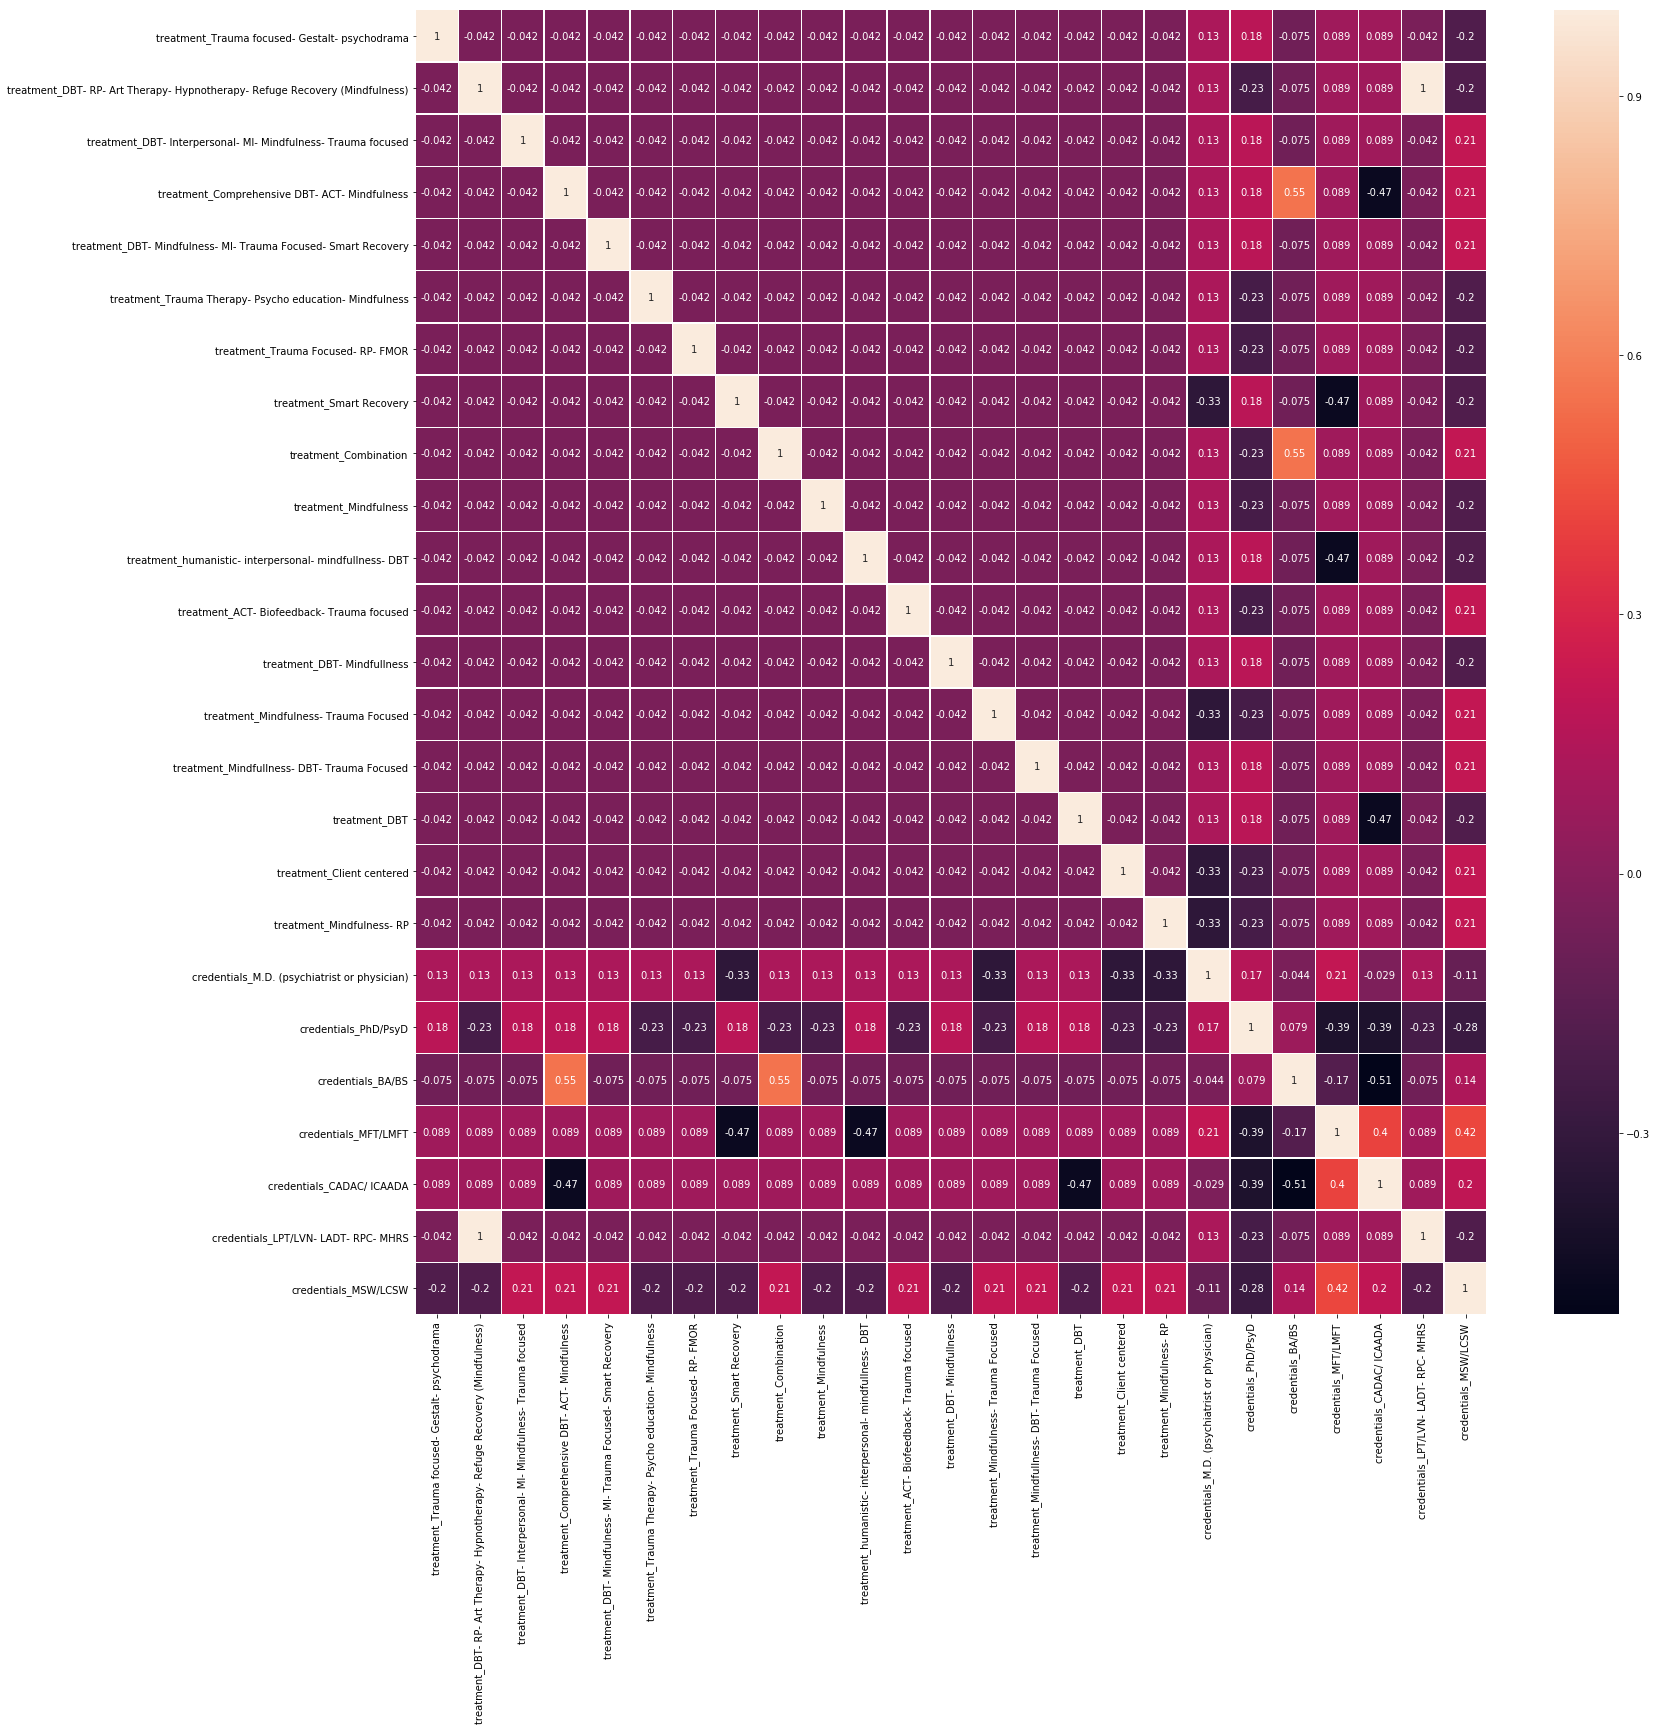

In [81]:
plt.subplots(figsize = (24,24))
sns.heatmap(NewData.iloc[:,30:55].corr(), annot = True, linewidths = 0.4)

In [82]:
NewData = NewData.drop(NewData.iloc[:,:4], axis = 1)

In [83]:
NewData.drop(['credentials_therapists_counselors'], axis = 1)

,12_step_program_onsite_meetings,12_step_transportation_offered,treatment_group_therapy,treatment_individual_therapy,individual_therapy_hours_per_week,dual_diagnosis_capable,psychotropic_medication_management,other_ancillary_services,Residential_Cost_Monthly,IOP_Cost_Monthly,Joint_Commission_accredited,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,typical_census_residential_clients,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,treatment_12-step based,treatment_neuro-rehabilitation,treatment_Spiritual,treatment_Relapse prevention- Dialectical Behavioral Therapy-,treatment_client centered- mindfulness,treatment_Psychodynamic,treatment_Trauma focused- Gestalt- psychodrama,treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness),treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused,treatment_Comprehensive DBT- ACT- Mindfulness,treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery,treatment_Trauma Therapy- Psycho education- Mindfulness,treatment_Trauma Focused- RP- FMOR,treatment_Smart Recovery,treatment_Combination,treatment_Mindfulness,treatment_humanistic- interpersonal- mindfullness- DBT,treatment_ACT- Biofeedback- Trauma focused,treatment_DBT- Mindfullness,treatment_Mindfulness- Trauma Focused,treatment_Mindfullness- DBT- Trauma Focused,treatment_DBT,treatment_Client centered,treatment_Mindfulness- RP,credentials_M.D. (psychiatrist or physician),credentials_PhD/PsyD,credentials_BA/BS,credentials_MFT/LMFT,credentials_CADAC/ ICAADA,credentials_LPT/LVN- LADT- RPC- MHRS,credentials_MSW/LCSW
0,No,Yes,Yes,Yes,NaN,Yes,No,NaN,25000.0,15000.0,Yes,18.0,36.0,NaN,1.0,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Family Therapy;Child Care Services;court syste...,30000.0,3250.0,Yes,6.0,10.0,NaN,NaN,NaN,NaN,NaN,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,Yes,NaN,Yes,Yes,2.0,Yes,Yes,Family Therapy,18000.0,NaN,No,30.0,0.0,1.0,2.0,25,13.0,13.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
3,Yes,NaN,Yes,Yes,1.0,Yes,Yes,Employment;Family Therapy,28600.0,15500.0,Yes,65.0,10.0,1.0,0.0,55,NaN,NaN,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
4,No,NaN,Yes,Yes,2.0,Yes,No,Family Therapy,NaN,2950.0,No,0.0,15.0,0.0,1.0,,NaN,7.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
5,Yes,NaN,Yes,Yes,2.0,Yes,Yes,Employment;Family Therapy;Medical;Dental,36000.0,7830.0,Yes,57.0,45.0,6.0,5.0,35,NaN,NaN,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1
6,No,Yes,Yes,Yes,NaN,Yes,Yes,Family Therapy,43000.0,12000.0,NaN,15.0,NaN,3.0,4.0,16,NaN,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1
7,Yes,NaN,Yes,Yes,3.0,Yes,Yes,Employment;Family Therapy,18500.0,3000.0,Yes,48.0,30.0,2.0,1.0,35,6.0,6.0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1
8,Yes,NaN,Yes,Yes,1.0,Yes,Yes,Employment;Family Therapy,17500.0,NaN,Yes,30.0,NaN,0.0,0.0,25,NaN,4.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
9,No,Yes,Yes,No,1.0,Yes,Yes,Employment;Family Therapy;Case Managment,18000.0,NaN,Yes,6.0,NaN,1.0,0.0,4,4.0,4.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [84]:
import math
#Add all Ancillary to an array
AncillaryList = []
for row in NewData['other_ancillary_services']:
    row = str(row)
    if row != 'nan':
        for element in row.split(";"):
            if element not in AncillaryList:
                AncillaryList.append(element)

In [85]:
#Create dummy variables based on the list for other ancillary services
AncillaryDict = {}
for i in AncillaryList:
    AncillaryDict["ancillary_services_" + i] = [0]*NewData.shape[0]
    
#Add 1 and 0 in Dummy variables
for rowIndex, row in enumerate(NewData['other_ancillary_services']):
    row = str(row)
    for i in AncillaryList:
        for element in row.split(";"):
            if i == element:
                AncillaryDict["ancillary_services_" + i][rowIndex] = 1 
                
#Create ancillary dataframe
AncillaryDF = pd.DataFrame(AncillaryDict)


In [86]:
NewData = pd.concat([NewData, AncillaryDF], axis = 1).drop(['other_ancillary_services'], axis = 1)

In [87]:
NewData = NewData.drop(['credentials_therapists_counselors'], axis = 1)

In [88]:
NewData_Dummies = pd.get_dummies(NewData)

In [89]:
NewDataForModel = NewData_Dummies.fillna(0)

In [90]:
#Normaliza all columns in dataframe
from sklearn import preprocessing

x = NewDataForModel.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
NewDataArray = pd.DataFrame(x_scaled)

In [91]:
NewDataDF = pd.DataFrame(NewDataArray)
NewDataDF.columns = NewDataForModel.columns

In [92]:
NewDataDF

,individual_therapy_hours_per_week,Residential_Cost_Monthly,IOP_Cost_Monthly,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,treatment_12-step based,treatment_neuro-rehabilitation,treatment_Spiritual,treatment_Relapse prevention- Dialectical Behavioral Therapy-,treatment_client centered- mindfulness,treatment_Psychodynamic,treatment_Trauma focused- Gestalt- psychodrama,treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness),treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused,treatment_Comprehensive DBT- ACT- Mindfulness,treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery,treatment_Trauma Therapy- Psycho education- Mindfulness,treatment_Trauma Focused- RP- FMOR,treatment_Smart Recovery,treatment_Combination,treatment_Mindfulness,treatment_humanistic- interpersonal- mindfullness- DBT,treatment_ACT- Biofeedback- Trauma focused,treatment_DBT- Mindfullness,treatment_Mindfulness- Trauma Focused,treatment_Mindfullness- DBT- Trauma Focused,treatment_DBT,treatment_Client centered,treatment_Mindfulness- RP,credentials_M.D. (psychiatrist or physician),credentials_PhD/PsyD,credentials_BA/BS,credentials_MFT/LMFT,credentials_CADAC/ ICAADA,credentials_LPT/LVN- LADT- RPC- MHRS,credentials_MSW/LCSW,ancillary_services_Family Therapy,ancillary_services_Child Care Services,ancillary_services_court system- yoga- acupuncture- Equine Therapy- meditation,ancillary_services_Employment,ancillary_services_Medical,ancillary_services_Dental,ancillary_services_Case Managment,ancillary_services_Refer out for Medical and Dental,ancillary_services_Educational/Training,12_step_program_onsite_meetings_No,12_step_program_onsite_meetings_Yes,12_step_transportation_offered_No,12_step_transportation_offered_Yes,treatment_group_therapy_Yes,treatment_individual_therapy_No,treatment_individual_therapy_Yes,dual_diagnosis_capable_No,dual_diagnosis_capable_Yes,psychotropic_medication_management_No,psychotropic_medication_management_Yes,Joint_Commission_accredited_No,Joint_Commission_accredited_Yes,typical_census_residential_clients_,typical_census_residential_clients_10,typical_census_residential_clients_16,typical_census_residential_clients_21,typical_census_residential_clients_25,typical_census_residential_clients_32,typical_census_residential_clients_35,typical_census_residential_clients_4,typical_census_residential_clients_40,typical_census_residential_clients_50,typical_census_residential_clients_55,typical_census_residential_clients_7,typical_census_residential_clients_9
0,0.000000,0.555556,0.769231,0.276923,0.180,0.000000,0.142857,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.666667,0.166667,0.092308,0.050,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.666667,0.400000,0.000000,0.461538,0.000,0.166667,0.285714,0.541667,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.635556,0.794872,1.000000,0.050,0.166667,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,

In [93]:
#Find y1 and y2 - IOP and Residential Treatment costs
y1 = NewDataForModel['IOP_Cost_Monthly']
y2 = NewDataForModel['Residential_Cost_Monthly']
x1 = NewDataForModel.drop(['IOP_Cost_Monthly'], axis = 1)
x2 = NewDataForModel.drop(['Residential_Cost_Monthly'], axis = 1)

In [94]:
#Build Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RandForestModel = RandomForestClassifier(n_estimators = 500)
RandForestModel.fit(x1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
RandForestModel.feature_importances_

array([0.03615107, 0.06109371, 0.05311037, 0.08923843, 0.03568962,
       0.03715491, 0.0180227 , 0.04873622, 0.01590838, 0.0167449 ,
       0.00570192, 0.01500898, 0.00754538, 0.00075389, 0.01290581,
       0.00596799, 0.00724605, 0.00517669, 0.00350199, 0.0081562 ,
       0.0006936 , 0.01033176, 0.00312324, 0.00560619, 0.0014046 ,
       0.00160129, 0.00615074, 0.00156816, 0.00212605, 0.00472829,
       0.00953955, 0.0096666 , 0.00610207, 0.01504811, 0.02406235,
       0.0137594 , 0.01551099, 0.01120905, 0.00748727, 0.02230557,
       0.00883541, 0.00754824, 0.00563148, 0.0095285 , 0.00931239,
       0.0059531 , 0.00055636, 0.00976245, 0.01256357, 0.0160456 ,
       0.01673282, 0.01476214, 0.02128275, 0.        , 0.00103804,
       0.00676078, 0.0020136 , 0.00312238, 0.03293696, 0.03512542,
       0.02451896, 0.01369729, 0.00626537, 0.0084078 , 0.00585608,
       0.00989805, 0.01095668, 0.0021832 , 0.01056308, 0.00533917,
       0.00197414, 0.01014307, 0.00859499, 0.00091979, 0.00533

In [96]:

FeatureImpZipped = sorted(zip(RandForestModel.feature_importances_, x1.columns), reverse = True)

In [97]:
FeatureImpDF = pd.DataFrame(list(FeatureImpZipped)).rename(columns = {1 : "Feature_names", 0: "Feature_Imp"})

In [98]:
FeatureImpDF["Feature_Imp_Values"] = FeatureImpDF["Feature_Imp"]

In [99]:
FeatureImpDF = FeatureImpDF.drop(["Feature_Imp"], axis = 1).reset_index().drop(["index"], axis = 1)

In [100]:
#Load variable Importances into a list
FeatureImp = FeatureImpDF['Feature_Imp_Values'][:20]
#Load Feature names
labels = FeatureImpDF['Feature_names'][:20]

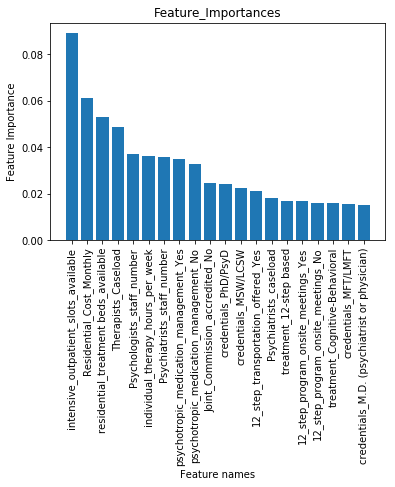

In [101]:
index = np.arange(len(x1.columns) - 1)[:20]
plt.bar(index, FeatureImp )
plt.xlabel("Feature names")
plt.ylabel("Feature Importance")
plt.xticks(index, labels, rotation = 90)
plt.title('Feature_Importances')
plt.show()

In [102]:
count = 1
for i in labels:
    print (count,i)
    count += 1

1 intensive_outpatient_slots_available
2 Residential_Cost_Monthly
3 residential_treatment beds_available
4 Therapists_Caseload
5 Psychologists_staff_number
6 individual_therapy_hours_per_week
7 Psychiatrists_staff_number
8 psychotropic_medication_management_Yes
9 psychotropic_medication_management_No
10 Joint_Commission_accredited_No
11 credentials_PhD/PsyD
12 credentials_MSW/LCSW
13 12_step_transportation_offered_Yes
14 Psychiatrists_caseload
15 treatment_12-step based
16 12_step_program_onsite_meetings_Yes
17 12_step_program_onsite_meetings_No
18 treatment_Cognitive-Behavioral
19 credentials_MFT/LMFT
20 credentials_M.D. (psychiatrist or physician)


<b> The major factors affecting Residential cost </b>

In [37]:
#Build Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RandForestModel = RandomForestClassifier(n_estimators = 500)
RandForestModel.fit(x2,y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
FeatureImpZipped = sorted(zip(RandForestModel.feature_importances_, x2.columns), reverse = True)

In [39]:
FeatureImpDF = pd.DataFrame(list(FeatureImpZipped)).rename(columns = {1 : "Feature_names", 0: "Feature_Imp"})

In [40]:
FeatureImpDF["Feature_Imp_Values"] = FeatureImpDF["Feature_Imp"]

In [41]:
FeatureImpDF = FeatureImpDF.drop(["Feature_Imp"], axis = 1).reset_index().drop(["index"], axis = 1)

In [42]:
#Load variable Importances into a list
FeatureImp = FeatureImpDF['Feature_Imp_Values'][:20]
#Load Feature names
labels = FeatureImpDF['Feature_names'][:20]

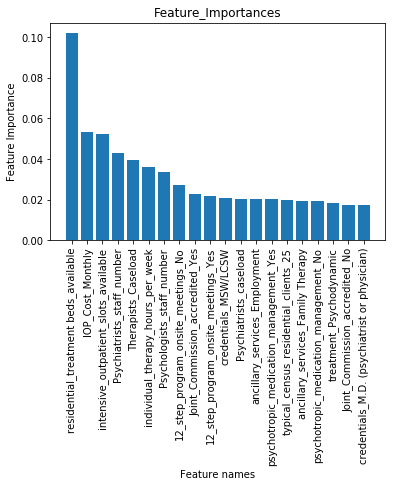

In [43]:
index = np.arange(len(x2.columns) - 1)[:20]
plt.bar(index, FeatureImp )
plt.xlabel("Feature names")
plt.ylabel("Feature Importance")
plt.xticks(index, labels, rotation = 90)
plt.title('Feature_Importances')
plt.show()

In [65]:
count = 1
for i in labels:
    print (count,i)
    count += 1

1 residential_treatment beds_available
2 IOP_Cost_Monthly
3 intensive_outpatient_slots_available
4 Psychiatrists_staff_number
5 Therapists_Caseload
6 individual_therapy_hours_per_week
7 Psychologists_staff_number
8 12_step_program_onsite_meetings_No
9 Joint_Commission_accredited_Yes
10 12_step_program_onsite_meetings_Yes
11 credentials_MSW/LCSW
12 Psychiatrists_caseload
13 ancillary_services_Employment
14 psychotropic_medication_management_Yes
15 typical_census_residential_clients_25
16 ancillary_services_Family Therapy
17 psychotropic_medication_management_No
18 treatment_Psychodynamic
19 Joint_Commission_accredited_No
20 credentials_M.D. (psychiatrist or physician)


In [44]:
NewDataForModel.to_csv('UCLA_IOP_RTP_Cost.csv')

In [45]:
NewDataForModel

,individual_therapy_hours_per_week,Residential_Cost_Monthly,IOP_Cost_Monthly,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,treatment_12-step based,treatment_neuro-rehabilitation,treatment_Spiritual,treatment_Relapse prevention- Dialectical Behavioral Therapy-,treatment_client centered- mindfulness,treatment_Psychodynamic,treatment_Trauma focused- Gestalt- psychodrama,treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness),treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused,treatment_Comprehensive DBT- ACT- Mindfulness,treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery,treatment_Trauma Therapy- Psycho education- Mindfulness,treatment_Trauma Focused- RP- FMOR,treatment_Smart Recovery,treatment_Combination,treatment_Mindfulness,treatment_humanistic- interpersonal- mindfullness- DBT,treatment_ACT- Biofeedback- Trauma focused,treatment_DBT- Mindfullness,treatment_Mindfulness- Trauma Focused,treatment_Mindfullness- DBT- Trauma Focused,treatment_DBT,treatment_Client centered,treatment_Mindfulness- RP,credentials_M.D. (psychiatrist or physician),credentials_PhD/PsyD,credentials_BA/BS,credentials_MFT/LMFT,credentials_CADAC/ ICAADA,credentials_LPT/LVN- LADT- RPC- MHRS,credentials_MSW/LCSW,ancillary_services_Family Therapy,ancillary_services_Child Care Services,ancillary_services_court system- yoga- acupuncture- Equine Therapy- meditation,ancillary_services_Employment,ancillary_services_Medical,ancillary_services_Dental,ancillary_services_Case Managment,ancillary_services_Refer out for Medical and Dental,ancillary_services_Educational/Training,12_step_program_onsite_meetings_No,12_step_program_onsite_meetings_Yes,12_step_transportation_offered_No,12_step_transportation_offered_Yes,treatment_group_therapy_Yes,treatment_individual_therapy_No,treatment_individual_therapy_Yes,dual_diagnosis_capable_No,dual_diagnosis_capable_Yes,psychotropic_medication_management_No,psychotropic_medication_management_Yes,Joint_Commission_accredited_No,Joint_Commission_accredited_Yes,typical_census_residential_clients_,typical_census_residential_clients_10,typical_census_residential_clients_16,typical_census_residential_clients_21,typical_census_residential_clients_25,typical_census_residential_clients_32,typical_census_residential_clients_35,typical_census_residential_clients_4,typical_census_residential_clients_40,typical_census_residential_clients_50,typical_census_residential_clients_55,typical_census_residential_clients_7,typical_census_residential_clients_9
0,0.0,25000.0,15000.0,18.0,36.0,0.0,1.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,30000.0,3250.0,6.0,10.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,18000.0,0.0,30.0,0.0,1.0,2.0,13.0,13.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,28600.0,15500.0,65.0,10.0,1.0,0.0,0.0,0.0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,0.0,2950.0,0.0,15.0,0.0,1.0,0.0,7.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,36000.0,7830.0,57.0,45.0,6.0,5.0,0.0,0.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0.0,43000.0,12000.0,15.0,0.0,3.0,4.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,3.0,18500.0,3000.0,48.0,30.0,2.0,1.0,6.0,6.0,1,1,0,1,0,0,1,0,0,0,

In [46]:
import geocoder

#testing
geocoder.osm(90007).json.keys()

dict_keys(['accuracy', 'address', 'bbox', 'city', 'confidence', 'country', 'country_code', 'county', 'importance', 'lat', 'lng', 'ok', 'osm_id', 'osm_type', 'place_id', 'place_rank', 'postal', 'quality', 'raw', 'region', 'state', 'status', 'suburb', 'type'])

In [47]:
lat = []
lon = []
for zipcode in data['Zipcode']:
    print (zipcode)
    result = geocoder.osm(zipcode)
    lat.append(result.json['lat'])
    lon.append(result.json['lng'])

90024
92562
94933
92675
95128
92014
90291
95126
92234
92673
95603
91942
95826
90004
94952
92078
94515
92683
91367
95067
92504
90049
95472
90069
92630


In [48]:
DataWithCoordinates = pd.DataFrame({'Lat': lat, 'Lng': lon})

In [49]:
DataWithCoordinates = pd.concat([data, DataWithCoordinates], axis = 1)

In [50]:
DataWithCoordinates

,Program Name,Address,Zipcode,treatment_philosophy_approach,12_step_program_onsite_meetings,12_step_transportation_offered,treatment_group_therapy,treatment_individual_therapy,individual_therapy_hours_per_week,dual_diagnosis_capable,psychotropic_medication_management,other_ancillary_services,Residential_Cost_Monthly,IOP_Cost_Monthly,Joint_Commission_accredited,residential_treatment beds_available,intensive_outpatient_slots_available,credentials_therapists_counselors,Psychiatrists_staff_number,Psychologists_staff_number,typical_census_residential_clients,Psychiatrists_caseload,Therapists_Caseload,Lat,Lng
0,MUSE treatment,1251 Westwood Blvd- Los Angeles- CA 90024,90024,Cognitive-Behavioral;12-step based;neuro-rehab...,No,Yes,Yes,Yes,NaN,Yes,No,NaN,25000.0,15000.0,Yes,18.0,36.0,M.D. (psychiatrist or physician);PhD/PsyD,NaN,1.0,NaN,NaN,NaN,37.796344,14.200227
1,Ranch Creek Recovery,25650 Bass Point Murrieta- CA 92562,92562,Cognitive-Behavioral;Spiritual;Relapse prevent...,NaN,NaN,Yes,Yes,NaN,Yes,Yes,Family Therapy;Child Care Services;court syste...,30000.0,3250.0,Yes,6.0,10.0,PhD/PsyD;BA/BS,NaN,NaN,NaN,NaN,NaN,33.568154,-117.224761
2,Serenity Knolls,145 Tamal Rd- Forest Knolls- CA,94933,Cognitive-Behavioral;12-step based;Spiritual;c...,Yes,NaN,Yes,Yes,2.0,Yes,Yes,Family Therapy,18000.0,NaN,No,30.0,0.0,M.D. (psychiatrist or physician);PhD/PsyD;MFT/...,1.0,2.0,25,13.0,13.0,38.015135,-122.689646
3,Hope by the Sea,33171 Paseo Cerveza- San Juan- California,92675,Cognitive-Behavioral;Psychodynamic;12-step bas...,Yes,NaN,Yes,Yes,1.0,Yes,Yes,Employment;Family Therapy,28600.0,15500.0,Yes,65.0,10.0,M.D. (psychiatrist or physician);PhD/PsyD;MFT/...,1.0,0.0,55,NaN,NaN,33.501120,-117.657159
4,Lyric Recovery Services- Inc,1210 S. Bascom Ave Suite 205- San Jose- CA,95128,Cognitive-Behavioral;DBT- RP- Art Therapy- Hyp...,No,NaN,Yes,Yes,2.0,Yes,No,Family Therapy,NaN,2950.0,No,0.0,15.0,M.D. (psychiatrist or physician);MFT/LMFT;CADA...,0.0,1.0,,NaN,7.0,37.520557,15.087302
5,Casa Palmera,14750 El Camino Real- Del Mar- CA,92014,Cognitive-Behavioral;12-step based;Spiritual;D...,Yes,NaN,Yes,Yes,2.0,Yes,Yes,Employment;Family Therapy;Medical;Dental,36000.0,7830.0,Yes,57.0,45.0,M.D. (psychiatrist or physician);PhD/PsyD;MSW/...,6.0,5.0,35,NaN,NaN,32.956681,-117.252519
6,Clear Veiw Treatment Programs,911 Coeur De Alene Ave- Venice- CA,90291,Cognitive-Behavioral;Comprehensive DBT- ACT- M...,No,Yes,Yes,Yes,NaN,Yes,Yes,Family Therapy,43000.0,12000.0,NaN,15.0,NaN,M.D. (psychiatrist or physician);PhD/PsyD;MSW/...,3.0,4.0,16,NaN,NaN,33.997846,-118.460671
7,New Start Recovery Solutions,173 N Morrison Ave Suite J- San Jose CA,95126,Cognitive-Behavioral;Psychodynamic;12-step bas...,Yes,NaN,Yes,Yes,3.0,Yes,Yes,Employment;Family Therapy,18500.0,3000.0,Yes,48.0,30.0,M.D. (psychiatrist or physician);PhD/PsyD;MSW/...,2.0,1.0,35,6.0,6.0,37.532445,15.108562
8,I Recover Palm Springs Addiction Treatment Center,37066 Bankside Dr- Cathedral City- CA,92234,Cognitive-Behavioral;12-step based,Yes,NaN,Yes,Yes,1.0,Yes,Yes,Employment;Family Therapy,17500.0,NaN,Yes,30.0,NaN,M.D. (psychiatrist or physician);MSW/LCSW;MFT/...,0.0,0.0,25,NaN,4.0,33.789411,-116.467613
9,Pure Life Recovery,901 Calle Amarecer Suite 25J- San Clemente- CA,92673,Cognitive-Behavioral;Psychodynamic;Trauma Ther...,No,Yes,Yes,No,1.0,Yes,Yes,Employment;Family Therapy;Case Managment,18000.0,NaN,Yes,6.0,NaN,M.D. (psychiatrist or physician);MFT/LMFT;CADA...,1.0,0.0,4,4.0,4.0,33.458770,-117.631546


In [51]:
DataWithCoordinates.to_csv('DataWithCoordinates.csv')

In [16]:
DataFile = pd.read_csv('UCLA_IOP_RTP_Cost.csv')

In [24]:
DataFile.columns

Index(['Unnamed: 0', 'individual_therapy_hours_per_week',
       'Residential_Cost_Monthly', 'IOP_Cost_Monthly',
       'residential_treatment beds_available',
       'intensive_outpatient_slots_available', 'Psychiatrists_staff_number',
       'Psychologists_staff_number', 'Psychiatrists_caseload',
       'Therapists_Caseload', 'treatment_Cognitive-Behavioral',
       'treatment_12-step based', 'treatment_neuro-rehabilitation',
       'treatment_Spiritual',
       'treatment_Relapse prevention- Dialectical Behavioral Therapy- ',
       'treatment_client centered- mindfulness ', 'treatment_Psychodynamic',
       'treatment_Trauma focused- Gestalt- psychodrama',
       'treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness)',
       'treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused',
       'treatment_Comprehensive DBT- ACT- Mindfulness',
       'treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery',
       'treatment_Trauma Therapy- Psycho edu

In [26]:
DataFile = DataFile.drop(['Unnamed: 0'], axis = 1)

In [28]:
DataFile.describe()

,individual_therapy_hours_per_week,Residential_Cost_Monthly,IOP_Cost_Monthly,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,...,typical_census_residential_clients_21,typical_census_residential_clients_25,typical_census_residential_clients_32,typical_census_residential_clients_35,typical_census_residential_clients_4,typical_census_residential_clients_40,typical_census_residential_clients_50,typical_census_residential_clients_55,typical_census_residential_clients_7,typical_census_residential_clients_9
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.00,25.000000,25.00,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00
mean,1.480000,18436.000000,6311.600000,21.200000,29.080000,0.920000,1.320000,2.120000,4.080000,0.880000,...,0.04,0.160000,0.04,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04
std,0.918332,13853.357896,5680.493435,20.818662,44.971213,1.411855,1.819341,5.479659,3.569781,0.331662,...,0.20,0.374166,0.20,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
25%,1.000000,8550.000000,2160.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
50%,2.000000,18000.000000,5400.000000,15.000000,12.000000,0.000000,1.000000,0.000000,5.000000,1.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
75%,2.000000,25000.000000,7830.000000,32.000000,36.000000,1.000000,2.000000,0.000000,6.000000,1.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
max,3.000000,45000.000000,19500.000000,65.000000,200.000000,6.000000,7.000000,24.000000,13.000000,1.000000,...,1.00,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00


In [29]:
pd.set_option('display.max_columns', 500)

In [30]:
DataFile

,individual_therapy_hours_per_week,Residential_Cost_Monthly,IOP_Cost_Monthly,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,treatment_12-step based,treatment_neuro-rehabilitation,treatment_Spiritual,treatment_Relapse prevention- Dialectical Behavioral Therapy-,treatment_client centered- mindfulness,treatment_Psychodynamic,treatment_Trauma focused- Gestalt- psychodrama,treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness),treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused,treatment_Comprehensive DBT- ACT- Mindfulness,treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery,treatment_Trauma Therapy- Psycho education- Mindfulness,treatment_Trauma Focused- RP- FMOR,treatment_Smart Recovery,treatment_Combination,treatment_Mindfulness,treatment_humanistic- interpersonal- mindfullness- DBT,treatment_ACT- Biofeedback- Trauma focused,treatment_DBT- Mindfullness,treatment_Mindfulness- Trauma Focused,treatment_Mindfullness- DBT- Trauma Focused,treatment_DBT,treatment_Client centered,treatment_Mindfulness- RP,credentials_M.D. (psychiatrist or physician),credentials_PhD/PsyD,credentials_BA/BS,credentials_MFT/LMFT,credentials_CADAC/ ICAADA,credentials_LPT/LVN- LADT- RPC- MHRS,credentials_MSW/LCSW,ancillary_services_Family Therapy,ancillary_services_Child Care Services,ancillary_services_court system- yoga- acupuncture- Equine Therapy- meditation,ancillary_services_Employment,ancillary_services_Medical,ancillary_services_Dental,ancillary_services_Case Managment,ancillary_services_Refer out for Medical and Dental,ancillary_services_Educational/Training,12_step_program_onsite_meetings_No,12_step_program_onsite_meetings_Yes,12_step_transportation_offered_No,12_step_transportation_offered_Yes,treatment_group_therapy_Yes,treatment_individual_therapy_No,treatment_individual_therapy_Yes,dual_diagnosis_capable_No,dual_diagnosis_capable_Yes,psychotropic_medication_management_No,psychotropic_medication_management_Yes,Joint_Commission_accredited_No,Joint_Commission_accredited_Yes,typical_census_residential_clients_,typical_census_residential_clients_10,typical_census_residential_clients_16,typical_census_residential_clients_21,typical_census_residential_clients_25,typical_census_residential_clients_32,typical_census_residential_clients_35,typical_census_residential_clients_4,typical_census_residential_clients_40,typical_census_residential_clients_50,typical_census_residential_clients_55,typical_census_residential_clients_7,typical_census_residential_clients_9
0,0.0,25000.0,15000.0,18.0,36.0,0.0,1.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,30000.0,3250.0,6.0,10.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,18000.0,0.0,30.0,0.0,1.0,2.0,13.0,13.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,28600.0,15500.0,65.0,10.0,1.0,0.0,0.0,0.0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,0.0,2950.0,0.0,15.0,0.0,1.0,0.0,7.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,36000.0,7830.0,57.0,45.0,6.0,5.0,0.0,0.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0.0,43000.0,12000.0,15.0,0.0,3.0,4.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,3.0,18500.0,3000.0,48.0,30.0,2.0,1.0,6.0,6.0,1,1,0,1,0,0,1,0,0,0,

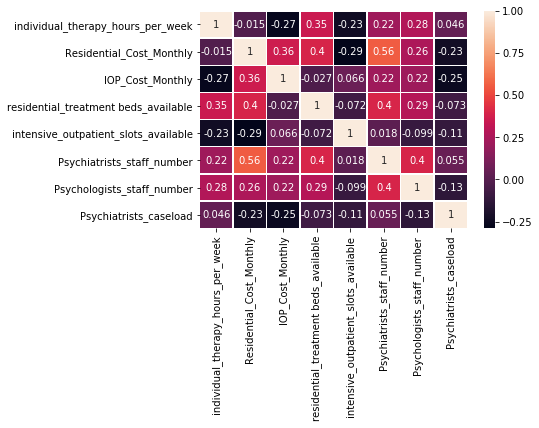

In [34]:
sns.heatmap(DataFile.iloc[:,:8].corr(), annot = True, linewidths = 0.4)

In [53]:
DataFile.iloc[:,:].describe()

,individual_therapy_hours_per_week,Residential_Cost_Monthly,IOP_Cost_Monthly,residential_treatment beds_available,intensive_outpatient_slots_available,Psychiatrists_staff_number,Psychologists_staff_number,Psychiatrists_caseload,Therapists_Caseload,treatment_Cognitive-Behavioral,treatment_12-step based,treatment_neuro-rehabilitation,treatment_Spiritual,treatment_Relapse prevention- Dialectical Behavioral Therapy-,treatment_client centered- mindfulness,treatment_Psychodynamic,treatment_Trauma focused- Gestalt- psychodrama,treatment_DBT- RP- Art Therapy- Hypnotherapy- Refuge Recovery (Mindfulness),treatment_DBT- Interpersonal- MI- Mindfulness- Trauma focused,treatment_Comprehensive DBT- ACT- Mindfulness,treatment_DBT- Mindfulness- MI- Trauma Focused- Smart Recovery,treatment_Trauma Therapy- Psycho education- Mindfulness,treatment_Trauma Focused- RP- FMOR,treatment_Smart Recovery,treatment_Combination,treatment_Mindfulness,treatment_humanistic- interpersonal- mindfullness- DBT,treatment_ACT- Biofeedback- Trauma focused,treatment_DBT- Mindfullness,treatment_Mindfulness- Trauma Focused,treatment_Mindfullness- DBT- Trauma Focused,treatment_DBT,treatment_Client centered,treatment_Mindfulness- RP,credentials_M.D. (psychiatrist or physician),credentials_PhD/PsyD,credentials_BA/BS,credentials_MFT/LMFT,credentials_CADAC/ ICAADA,credentials_LPT/LVN- LADT- RPC- MHRS,credentials_MSW/LCSW,ancillary_services_Family Therapy,ancillary_services_Child Care Services,ancillary_services_court system- yoga- acupuncture- Equine Therapy- meditation,ancillary_services_Employment,ancillary_services_Medical,ancillary_services_Dental,ancillary_services_Case Managment,ancillary_services_Refer out for Medical and Dental,ancillary_services_Educational/Training,12_step_program_onsite_meetings_No,12_step_program_onsite_meetings_Yes,12_step_transportation_offered_No,12_step_transportation_offered_Yes,treatment_group_therapy_Yes,treatment_individual_therapy_No,treatment_individual_therapy_Yes,dual_diagnosis_capable_No,dual_diagnosis_capable_Yes,psychotropic_medication_management_No,psychotropic_medication_management_Yes,Joint_Commission_accredited_No,Joint_Commission_accredited_Yes,typical_census_residential_clients_,typical_census_residential_clients_10,typical_census_residential_clients_16,typical_census_residential_clients_21,typical_census_residential_clients_25,typical_census_residential_clients_32,typical_census_residential_clients_35,typical_census_residential_clients_4,typical_census_residential_clients_40,typical_census_residential_clients_50,typical_census_residential_clients_55,typical_census_residential_clients_7,typical_census_residential_clients_9
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00,25.0,25.00,25.00,25.000000,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.00,25.000000,25.000000,25.00,25.00,25.000000,25.000000,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.00,25.000000,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.000000,25.00,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00
mean,1.480000,18436.000000,6311.600000,21.200000,29.080000,0.920000,1.320000,2.120000,4.080000,0.880000,0.680000,0.04,0.4,0.04,0.04,0.320000,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.720000,0.560000,0.120000,0.840000,0.840000,0.04,0.480000,0.880000,0.04,0.04,0.440000,0.080000,0.04,0.04,0.04,0.120000,0.440000,0.520000,0.080000,0.4,1.0,0.04,0.920000,0.04,0.96,0.280000,0.640000,0.440000,0.480000,0.04,0.04,0.04,0.04,0.160000,0.04,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04
std,0.918332,13853.357896,5680.493435,20.818662,44.971213,1.411855,1.819341,5.479659,3.569781,0.331662,0.476095,0.20,0.5,0.20,0.20,0.476095,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20

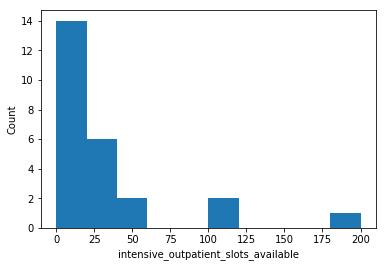

In [56]:
plt.hist(DataFile.iloc[:,4])
plt.xlabel(DataFile.columns[4])
plt.ylabel("Count")
plt.show()